In [134]:
import pandas as pd 
import numpy as np
import math
import IPython
import IPython.display
import matplotlib.pyplot as plt
from kneed import KneeLocator
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import seaborn as sns
import json
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)


In [168]:
with open('../data/raw/block_stats_717_609_dump.json','r') as f:
    data = json.loads(f.read())
df = pd.json_normalize(data,  max_level=1)

In [169]:
df.head()

avgfee  avgfeerate  avgtxsize  \
0    2156           5        682   
1    1525           4        549   
2    6628           9       1424   
3    3873           8        793   
4    2940           6        853   

                                           blockhash feerate_percentiles  \
0  0000000000000000000a1f8c514e14383378027df9d09e...     [1, 2, 2, 4, 9]   
1  00000000000000000005b8a11714c19cb7b49eb3441615...     [2, 3, 3, 4, 5]   
2  000000000000000000017c0dc447fcc38e0ff3ec0889dd...     [4, 4, 7, 7, 9]   
3  00000000000000000005d49059ecd13c5f5cc57d4437c7...    [4, 4, 5, 7, 10]   
4  00000000000000000008fc64393f85e314429f6b17d0c9...     [4, 4, 5, 6, 7]   

   height   ins  maxfee  maxfeerate  maxtxsize  medianfee  mediantime  \
0  727609  7981  338130         346     167455        605  1647443684   
1  727608  7505  193996         272     106374        590  1647442553   
2  727607  7016  597983         349      92187       1160  1647441552   
3  727606  6814  439640         269      83200       1100  1647441410   
4  727605  6588  278748         371      92191        913  1647441286   

   mediantxsize  minfee  minfeerate  mintxsize  outs    subsidy  swtotal_size  \
0           225     112           1        151  6558  625000000       1470492   
1           225     110           1        151  7022  625000000       1438816   
2           225     330           1        188  4380  625000000       1907606   
3           226     192           1        152  7702  625000000       1385134   
4           225     172           1        163  7341  625000000       1676225   

   swtotal_weight  swtxs        time      total_out  total_size  total_weight  \
0         3281715   2101  1647445268  3410696965340     1647991       3991711   
1         3204862   2557  1647444991   426035824529     1636754       3996614   
2         3642260   1151  1647444782   415981617544     1995027       3991944   
3         2994703   1666  1647444350  6435414051194     1634416       3991831   
4         3598538   1795  1647443814   680578635895     1774510       3991678   

   totalfee   txs  utxo_increase  utxo_size_inc  
0   5204878  2415          -1423        -100026  
1   4541963  2979           -483         -33362  
2   9286897  1402          -2636        -191522  
3   7983917  2062            888          66269  
4   6110328  2079            753          57523

In [170]:
df.drop('blockhash', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)


# Possible remove subsidy	swtotal_size	swtotal_weight	swtxs as well

In [171]:
df.describe().transpose()

count          mean           std           min  \
avgfee          10000.0  4.745865e+03  5.041193e+03  0.000000e+00   
avgfeerate      10000.0  9.083800e+00  5.860854e+00  0.000000e+00   
avgtxsize       10000.0  8.733820e+02  1.150998e+03  0.000000e+00   
ins             10000.0  5.509791e+03  2.458271e+03  0.000000e+00   
maxfee          10000.0  5.551891e+05  9.261225e+05  0.000000e+00   
maxfeerate      10000.0  4.215120e+02  4.461408e+02  0.000000e+00   
maxtxsize       10000.0  8.718041e+04  4.771797e+04  0.000000e+00   
medianfee       10000.0  1.232633e+03  1.542280e+03  0.000000e+00   
mediantime      10000.0  1.644473e+09  1.698507e+06  1.641575e+09   
mediantxsize    10000.0  2.486286e+02  7.424095e+02  0.000000e+00   
minfee          10000.0  1.623109e+02  1.053869e+02  0.000000e+00   
minfeerate      10000.0  1.049700e+00  4.883173e-01  0.000000e+00   
mintxsize       10000.0  1.703601e+02  2.063828e+01  0.000000e+00   
outs            10000.0  5.694527e+03  3.474646e+03  1.000000e+00   
subsidy         10000.0  6.250000e+08  0.000000e+00  6.250000e+08   
swtotal_size    10000.0  9.865960e+05  4.631542e+05  0.000000e+00   
swtotal_weight  10000.0  2.391090e+06  1.088131e+06  0.000000e+00   
swtxs           10000.0  1.404954e+03  8.049445e+02  0.000000e+00   
time            10000.0  1.644476e+09  1.698568e+06  1.641577e+09   
total_out       10000.0  2.923547e+12  4.178981e+12  0.000000e+00   
total_size      10000.0  1.164536e+06  5.072459e+05  0.000000e+00   
total_weight    10000.0  3.102851e+06  1.320759e+06  0.000000e+00   
totalfee        10000.0  7.690032e+06  6.514769e+06  0.000000e+00   
txs             10000.0  1.709144e+03  9.673118e+02  1.000000e+00   
utxo_increase   10000.0  1.847361e+02  3.128568e+03 -1.227000e+04   
utxo_size_inc   10000.0  1.602506e+04  2.299689e+05 -8.889660e+05   

                         25%           50%           75%           max  
avgfee          2.848000e+03  3.768500e+03  5.282500e+03  2.491460e+05  
avgfeerate      6.000000e+00  8.000000e+00  1.100000e+01  1.030000e+02  
avgtxsize       5.250000e+02  6.290000e+02  8.500000e+02  3.422100e+04  
ins             3.820500e+03  6.524000e+03  7.089000e+03  1.252700e+04  
maxfee          1.903720e+05  3.490250e+05  5.441050e+05  1.453920e+07  
maxfeerate      2.690000e+02  3.460000e+02  4.720000e+02  1.495800e+04  
maxtxsize       5.620675e+04  8.553900e+04  1.027380e+05  2.694390e+05  
medianfee       6.927500e+02  1.008000e+03  1.487250e+03  1.028120e+05  
mediantime      1.642983e+09  1.644482e+09  1.645951e+09  1.647444e+09  
mediantxsize    2.260000e+02  2.260000e+02  2.460000e+02  5.019700e+04  
minfee          1.100000e+02  1.370000e+02  1.720000e+02  2.813000e+03  
minfeerate      1.000000e+00  1.000000e+00  1.000000e+00  2.400000e+01  
mintxsize       1.510000e+02  1.870000e+02  1.880000e+02  2.240000e+02  
outs            2.744000e+03  5.551000e+03  8.377000e+03  2.123800e+04  
subsidy         6.250000e+08  6.250000e+08  6.250000e+08  6.250000e+08  
swtotal_size    6.419208e+05  1.130810e+06  1.317982e+06  2.337707e+06  
swtotal_weight  1.548462e+06  2.903717e+06  3.218397e+06  3.993286e+06  
swtxs           7.087500e+02  1.404000e+03  2.080000e+03  4.529000e+03  
time            1.642987e+09  1.644489e+09  1.645953e+09  1.647445e+09  
total_out       2.508912e+11  1.506319e+12  3.784942e+12  7.091528e+13  
total_size      8.377872e+05  1.381130e+06  1.521555e+06  2.340358e+06  
total_weight    2.155509e+06  3.991712e+06  3.991951e+06  3.997999e+06  
totalfee        3.028770e+06  6.174693e+06  1.077664e+07  9.978935e+07  
txs             8.770000e+02  1.713500e+03  2.546250e+03  4.728000e+03  
utxo_increase  -1.437000e+03  1.940000e+02  1.853250e+03  1.825200e+04  
utxo_size_inc  -1.040055e+05  1.673050e+04  1.390108e+05  1.350519e+06

In [172]:
## Apply date transform 
def as_date(ts):
    return(datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

df.time = pd.to_datetime(df.time.apply(as_date))
df.set_index('time', inplace=True)

In [174]:
## Flatten percentiles array
df.feerate_percentiles

time
2022-03-16 11:41:08      [1, 2, 2, 4, 9]
2022-03-16 11:36:31      [2, 3, 3, 4, 5]
2022-03-16 11:33:02      [4, 4, 7, 7, 9]
2022-03-16 11:25:50     [4, 4, 5, 7, 10]
2022-03-16 11:16:54      [4, 4, 5, 6, 7]
                             ...        
2022-01-07 13:03:02    [6, 6, 9, 11, 21]
2022-01-07 12:53:20      [3, 3, 4, 5, 5]
2022-01-07 12:52:59     [5, 6, 6, 9, 13]
2022-01-07 12:46:34      [6, 6, 6, 6, 9]
2022-01-07 12:43:26     [6, 6, 6, 7, 11]
Name: feerate_percentiles, Length: 10000, dtype: object

In [175]:
df['feerate_10_percentiles'] = np.NaN
df['feerate_25_percentiles'] = np.NaN
df['feerate_50_percentiles'] = np.NaN
df['feerate_75_percentiles'] = np.NaN
df['feerate_90_percentiles'] = np.NaN

for index, row in df.iterrows():
    df.loc[index, 'feerate_10_percentiles'] =  row['feerate_percentiles'][0]
    df.loc[index, 'feerate_25_percentiles'] = row['feerate_percentiles'][1]
    df.loc[index, 'feerate_50_percentiles'] = row['feerate_percentiles'][2]
    df.loc[index, 'feerate_75_percentiles'] = row['feerate_percentiles'][3]
    df.loc[index,'feerate_90_percentiles'] = row['feerate_percentiles'][4]

df.drop('feerate_percentiles', axis=1, inplace=True)




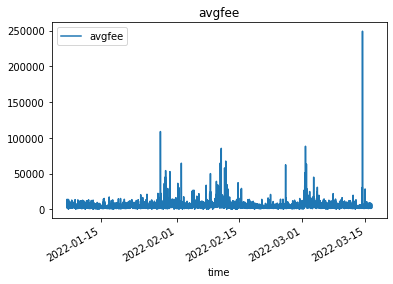

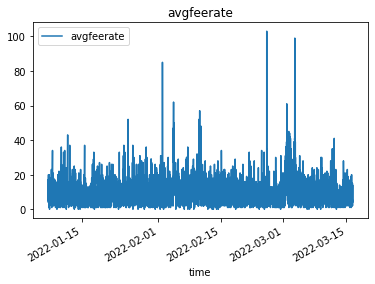

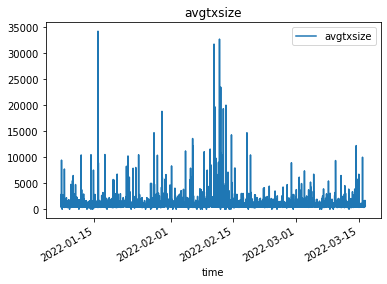

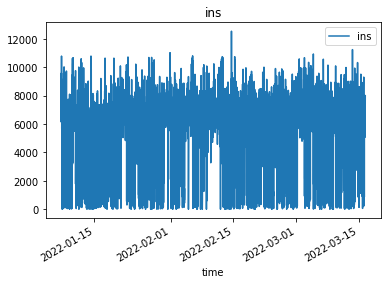

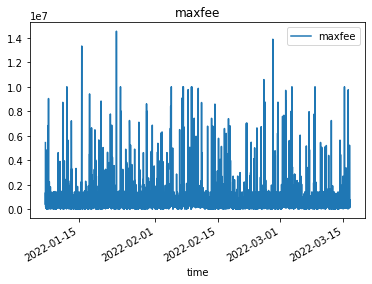

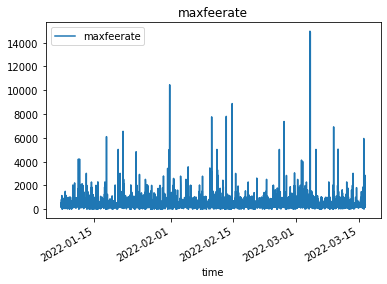

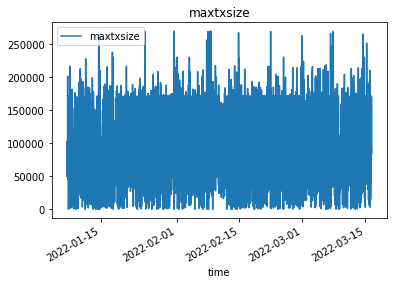

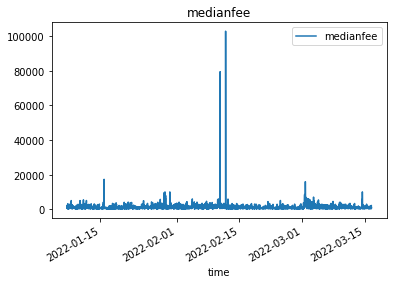

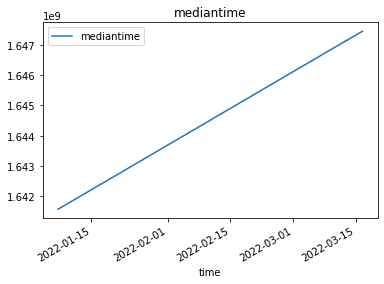

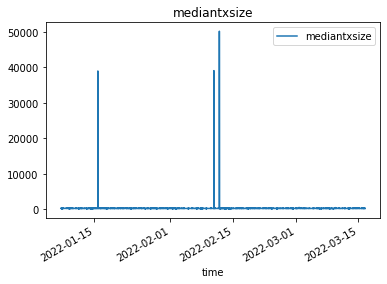

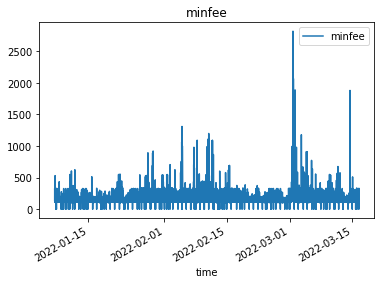

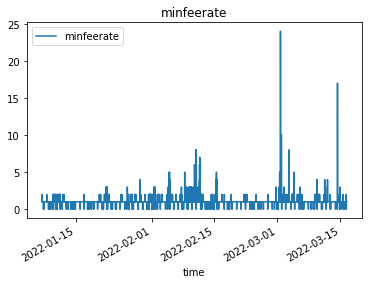

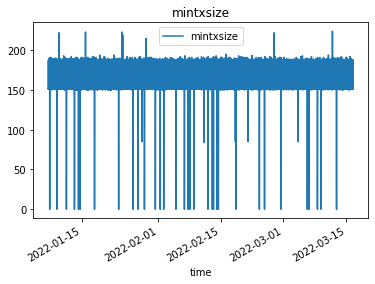

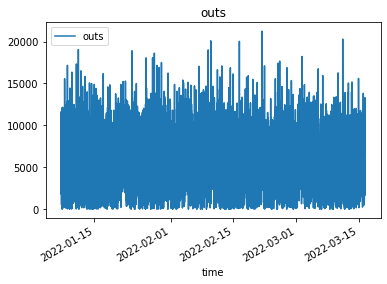

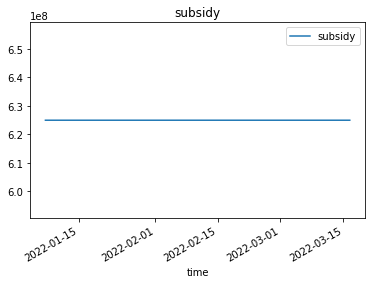

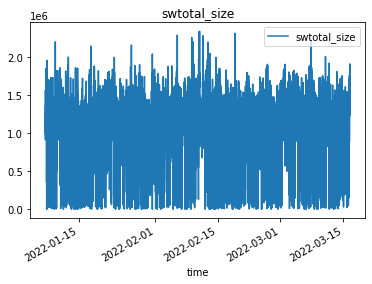

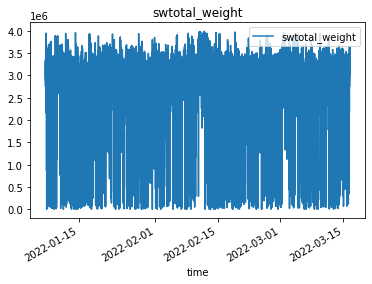

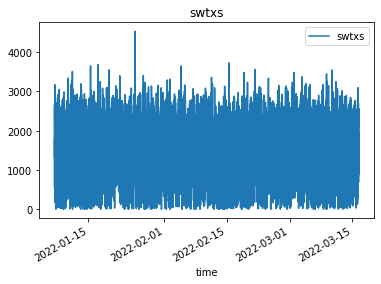

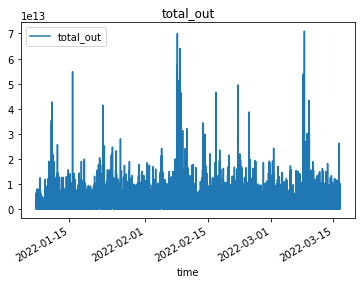

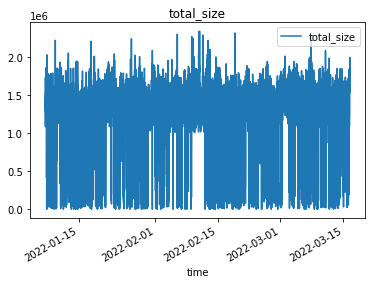

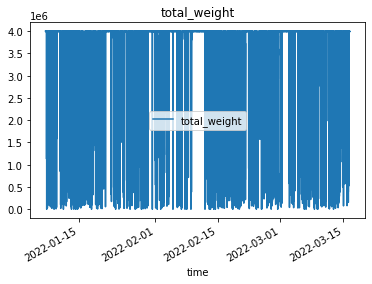

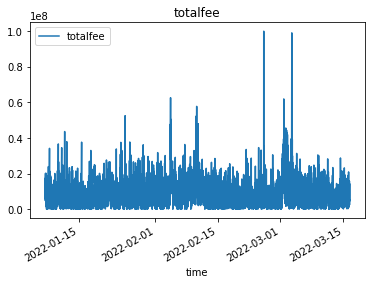

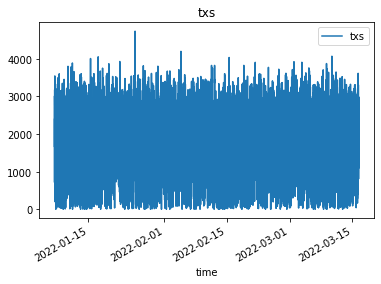

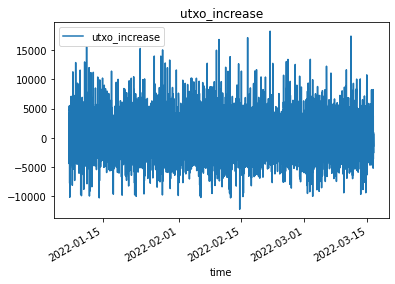

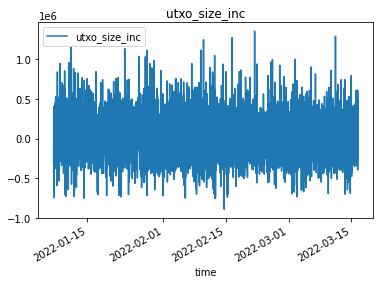

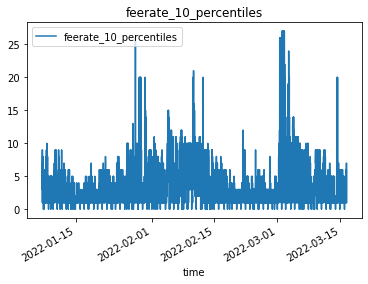

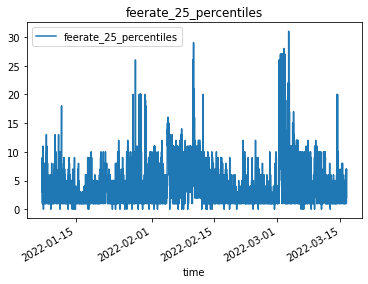

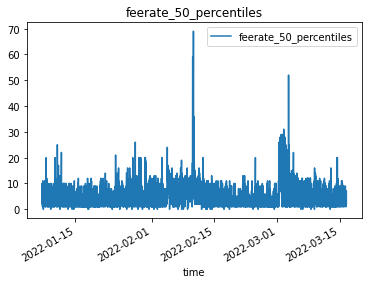

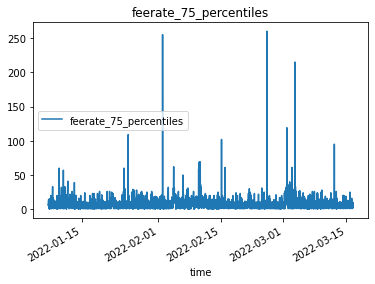

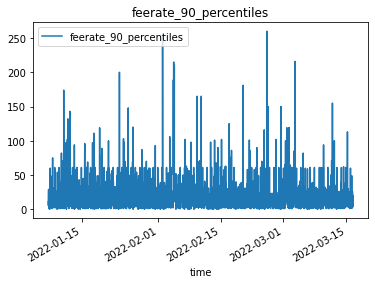

In [176]:
df.columns
for col in df.columns:
    df.plot(use_index=True, y=col, kind='line', title=col)

In [143]:
### normalize with min max

mean = df.mean()
std = df.std()
df_normalized = (df - mean) / std

df_normalized

avgfee  avgfeerate  avgtxsize       ins    maxfee  \
time                                                                       
2022-03-16 11:41:08 -0.253990   -0.751168  -0.158476  1.095987 -0.153454   
2022-03-16 11:36:31 -0.332038   -0.987906  -0.330075  0.903792 -0.334382   
2022-03-16 11:33:02  0.299149    0.195782   0.798865  0.706348  0.172734   
2022-03-16 11:25:50 -0.041615   -0.040956  -0.015262  0.624786 -0.026031   
2022-03-16 11:16:54 -0.157018   -0.514431   0.062151  0.533534 -0.227995   
...                       ...         ...        ...       ...       ...   
2022-03-09 16:50:50  0.008603   -0.040956  -0.053968  0.676469  0.103828   
2022-03-09 16:48:56  0.166431    1.852945  -0.415229  0.475795 -0.099469   
2022-03-09 16:19:34 -0.151823   -1.224643   0.287939  0.628016 -0.248453   
2022-03-09 16:19:20 -0.171737   -1.224643   0.515017  1.475129 -0.356135   
2022-03-09 16:19:00 -0.088494    0.432519  -0.253952  0.679699 -0.004603   

                     maxfeerate  maxtxsize  medianfee  mediantime  \
time                                                                
2022-03-16 11:41:08   -0.134298   1.604819  -0.851636    1.744168   
2022-03-16 11:36:31   -0.329538   0.373340  -0.878604    1.737440   
2022-03-16 11:33:02   -0.126383   0.087309   0.146168    1.731486   
2022-03-16 11:25:50   -0.337453  -0.093881   0.038298    1.730641   
2022-03-16 11:16:54   -0.068339   0.087390  -0.297899    1.729904   
...                         ...        ...        ...         ...   
2022-03-09 16:50:50   -0.363837   0.297331   0.601023   -1.725399   
2022-03-09 16:48:56    0.543763  -0.548239   2.082448   -1.726333   
2022-03-09 16:19:34   -0.770146  -0.156180  -0.653873   -1.729551   
2022-03-09 16:19:20   -0.833467  -0.046623  -0.670053   -1.732882   
2022-03-09 16:19:00    0.155923   0.087209  -0.952315   -1.735196   

                     mediantxsize    minfee  minfeerate  mintxsize      outs  \
time                                                                           
2022-03-16 11:41:08     -0.435658 -0.468548   -0.059809  -0.960513  0.265145   
2022-03-16 11:36:31     -0.435658 -0.491100   -0.059809  -0.960513  0.400620   
2022-03-16 11:33:02     -0.435658  1.989544   -0.059809   0.999394 -0.370770   
2022-03-16 11:25:50     -0.392562  0.433504   -0.059809  -0.907543  0.599161   
2022-03-16 11:16:54     -0.435658  0.207991   -0.059809  -0.324868  0.493759   
...                           ...       ...         ...        ...       ...   
2022-03-09 16:50:50     -0.392562 -0.130279   -0.059809  -0.907543  0.795658   
2022-03-09 16:48:56     -0.435658  1.797858   -0.059809  -0.801602  1.605880   
2022-03-09 16:19:34      5.597796 -0.141555   -0.059809  -0.907543 -0.902743   
2022-03-09 16:19:20      0.555552 -0.491100   -0.059809   1.052364 -0.856903   
2022-03-09 16:19:00     -0.521851 -0.141555   -0.059809  -0.907543  0.426313   

                     subsidy  swtotal_size  swtotal_weight     swtxs  \
time                                                                   
2022-03-16 11:41:08      NaN      1.104986        0.904260  0.919600   
2022-03-16 11:36:31      NaN      1.036563        0.833249  1.499135   
2022-03-16 11:33:02      NaN      2.049185        1.237400 -0.287763   
2022-03-16 11:25:50      NaN      0.920606        0.639064  0.366755   
2022-03-16 11:16:54      NaN      1.549385        1.197001  0.530702   
...                      ...           ...             ...       ...   
2022-03-09 16:50:50      NaN      0.830548        0.696592  0.331170   
2022-03-09 16:48:56      NaN      0.722870        0.909936  1.396191   
2022-03-09 16:19:34      NaN     -0.438208        0.070765 -0.752916   
2022-03-09 16:19:20      NaN      1.109748        1.104130 -0.465690   
2022-03-09 16:19:00      NaN      1.505842        1.099962  1.562680   

                     total_out  total_size  total_weight  totalfee       txs  \
time                                                                          

In [177]:
import sklearn

print(sklearn.__version__)


df.columns


1.0.2


Index(['avgfee', 'avgfeerate', 'avgtxsize', 'ins', 'maxfee', 'maxfeerate',
       'maxtxsize', 'medianfee', 'mediantime', 'mediantxsize', 'minfee',
       'minfeerate', 'mintxsize', 'outs', 'subsidy', 'swtotal_size',
       'swtotal_weight', 'swtxs', 'total_out', 'total_size', 'total_weight',
       'totalfee', 'txs', 'utxo_increase', 'utxo_size_inc',
       'feerate_10_percentiles', 'feerate_25_percentiles',
       'feerate_50_percentiles', 'feerate_75_percentiles',
       'feerate_90_percentiles'],
      dtype='object')

In [207]:
## Feature selection and eng

from sklearn.model_selection import train_test_split

print(df.columns)

# create datasets
train, test = train_test_split(df, test_size=0.1, random_state=42)
# This is where we pick what cols are labels vs inputs
# i.e feature space


# labels = ['feerate_10_percentiles', 'feerate_25_percentiles',
#        'feerate_50_percentiles', 'feerate_75_percentiles',
#        'feerate_90_percentiles']

label = ['minfee', 'maxfee', 'medianfee']

inputs = ['avgfee', 'avgfeerate', 'avgtxsize', 'maxtxsize', 'mediantxsize', 'mintxsize', 'feerate_10_percentiles', 'feerate_25_percentiles', 'feerate_50_percentiles', 'feerate_75_percentiles', 'feerate_90_percentiles']

train_labels = train[labels].copy()
train_inputs = train[inputs].copy()

test_labels = test[labels].copy()
test_inputs = test[inputs].copy()



Index(['avgfee', 'avgfeerate', 'avgtxsize', 'ins', 'maxfee', 'maxfeerate',
       'maxtxsize', 'medianfee', 'mediantime', 'mediantxsize', 'minfee',
       'minfeerate', 'mintxsize', 'outs', 'subsidy', 'swtotal_size',
       'swtotal_weight', 'swtxs', 'total_out', 'total_size', 'total_weight',
       'totalfee', 'txs', 'utxo_increase', 'utxo_size_inc',
       'feerate_10_percentiles', 'feerate_25_percentiles',
       'feerate_50_percentiles', 'feerate_75_percentiles',
       'feerate_90_percentiles'],
      dtype='object')


In [208]:
# linear regression for multioutput regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# define model
model = LinearRegression()
# fit model
model.fit(train_inputs, train_labels)
# make a prediction
r2_score = model.score(test_inputs, test_labels)

r2_score

1.0

In [198]:
# decision tree for multioutput regression
from sklearn.tree import DecisionTreeRegressor
# define model
model = DecisionTreeRegressor()
# fit model
model.fit(train_inputs, train_labels)

accuracy = model.score(test_inputs, test_labels)

accuracy

0.5087108917576376

In [201]:
# k-nearest neighbors for multioutput regression
from sklearn.neighbors import KNeighborsRegressor
# define model
model = KNeighborsRegressor(n_neighbors=3)
# fit model
model.fit(train_inputs, train_labels)


accuracy = model.score(test_inputs, test_labels)

accuracy

0.3945536975147982

In [197]:
### TimeSeries 

df = df.sort_index()
df.head()


avgfee  avgfeerate  avgtxsize   ins   maxfee  maxfeerate  \
time                                                                            
2022-01-07 12:43:26    7219          17        610  6956  5441172         469   
2022-01-07 12:46:34   14014          10       1522  6580   855680         302   
2022-01-07 12:52:59    6070          11        766  7620  2377982         302   
2022-01-07 12:53:20    1604           4        575  7272   370440         202   
2022-01-07 13:03:02    9962          16        791  6812   605920         346   

                     maxtxsize  medianfee  mediantime  mediantxsize  minfee  \
time                                                                          
2022-01-07 12:43:26      80512       1390  1641574692           247     141   
2022-01-07 12:46:34      92274       2060  1641574723           247     327   
2022-01-07 12:52:59     102510       1460  1641576540           248     303   
2022-01-07 12:53:20      65757        769  1641576622           225     143   
2022-01-07 13:03:02      84722       2087  1641577300           226     313   

                     minfeerate  mintxsize  outs    subsidy  swtotal_size  \
time                                                                        
2022-01-07 12:43:26           1        152  5898  625000000       1183340   
2022-01-07 12:46:34           2        188  2127  625000000        914081   
2022-01-07 12:52:59           1        188  6004  625000000       1291511   
2022-01-07 12:53:20           1        151  6301  625000000       1566189   
2022-01-07 13:03:02           1        152  5415  625000000        998453   

                     swtotal_weight  swtxs      total_out  total_size  \
time                                                                    
2022-01-07 12:43:26         2906270   1790   672946906293     1456266   
2022-01-07 12:46:34         3306344    538  2548063665887     1085443   
2022-01-07 12:52:59         3198104   1617  3131082924293     1489942   
2022-01-07 12:53:20         3327072   2670   146610621695     1732400   
2022-01-07 13:03:02         2754224   1302  1314552888683     1307804   

                     total_weight  totalfee   txs  utxo_increase  \
time                                                               
2022-01-07 12:43:26       3997974  17232234  2388          -1058   
2022-01-07 12:46:34       3991792   9992520   714          -4453   
2022-01-07 12:52:59       3991828  11807243  1946          -1616   
2022-01-07 12:53:20       3991916   4825075  3009           -971   
2022-01-07 13:03:02       3991628  16467858  1654          -1397   

                     utxo_size_inc  feerate_10_percentiles  \
time                                                         
2022-01-07 12:43:26         -77748                     6.0   
2022-01-07 12:46:34        -334909                     6.0   
2022-01-07 12:52:59        -118504                     5.0   
2022-01-07 12:53:20         -68227                     3.0   
2022-01-07 13:03:02        -105175                     6.0   

                     feerate_25_percentiles  feerate_50_percentiles  \
time                                                                  
2022-01-07 12:43:26                     6.0                     6.0   
2022-01-07 12:46:34                     6.0                     6.0   
2022-01-07 12:52:59                     6.0                     6.0   
2022-01-07 12:53:20                     3.0                     4.0   
2022-01-07 13:03:02                     6.0                     9.0   

                     feerate_75_percentiles  feerate_90_percentiles  
time                                                                 
2022-01-07 12:43:26                     7.0                    11.0  
2022-01-07 12:46:34                     6.0                     9.0  
2022-01-07 12:52:59                     9.0                    13.0  
2022-01-07 12:53:20                     5.0                     5.0  
2022-01-07 13:03:

In [209]:
# ==============================================================================
# Create and train forecaster
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

forecaster = ForecasterAutoreg(
                regressor=RandomForestRegressor(random_state=42),
                lags=6
             )

forecaster.fit(y=train['y'])

forecaster

KeyError: 'y'